pip install pandas-datareader

### Future price respects
- 1-Year Treasury Note: ^TNX
- 2-Year Treasury Note: ^USTTWO
- 3-Year Treasury Note: ^USTHREE
- 5-Year Treasury Note: ^FVX
- 7-Year Treasury Note: ^IRX
- 10-Year Treasury Note: ^TNX
- 20-Year Treasury Bond: ^TYX
- 30-Year Treasury Bond: ^TYX

In [5]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
import datetime

# commodity_symbol = "GC=F"  # Gold symbol
# start_date = "2023-01-01"
# end_date = "2023-06-27"


# data = yf.download(commodity_symbol, start=start_date, end=end_date)
# print(data.tail(10))

### 챠트 그리기 설정

In [6]:
# matplotlib rebuild
import matplotlib as mpl


# mpl.font_manager._rebuild()

# matplotlib 환경 설정
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'Malgun Gothic' # window
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

### 데이터 가져오기

In [7]:
soxx = '^USD/JPY'  
start_date = "2023-01-01"
end_date = "2023-06-27"
df_sox = yf.download(soxx, start=start_date, end=end_date)
print(df_sox.tail(10))

Failed to get ticker '^USD/JPY' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['^USD/JPY']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [8]:
Treasury_list = ['^TNX','^TYX']
# commodity_symbol = "GC=F"  # Gold symbol
start_date = "2000-01-01"
end_date = "2023-06-27"

for tn in Treasury_list:
    data = yf.download(Treasury_list, start=start_date, end=end_date)
print(data.tail(10))

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
           Adj Close         Close          High           Low          Open  \
                ^TNX   ^TYX   ^TNX   ^TYX   ^TNX   ^TYX   ^TNX   ^TYX   ^TNX   
Date                                                                           
2023-06-12     3.765  3.907  3.765  3.907  3.794  3.937  3.711  3.851  3.734   
2023-06-13     3.839  3.941  3.839  3.941  3.841  3.945  3.682  3.837  3.724   
2023-06-14     3.796  3.881  3.796  3.881  3.851  3.943  3.771  3.872  3.811   
2023-06-15     3.728  3.848  3.728  3.848  3.841  3.907  3.707  3.802  3.819   
2023-06-16     3.769  3.855  3.769  3.855  3.806  3.888  3.725  3.827  3.746   
2023-06-20     3.729  3.818  3.729  3.818  3.777  3.862  3.701  3.801  3.738   
2023-06-21     3.723  3.808  3.723  3.808  3.789  3.874  3.711  3.803  3.762   
2023-06-22     3.799  3.872  3.799  3.872  3.810  3.880  3.711

In [9]:
data['Close'].tail(90)

,^TNX,^TYX
Date,,
2023-02-15,3.809,3.854
2023-02-16,3.843,3.904
2023-02-17,3.828,3.888
2023-02-21,3.955,3.977
2023-02-22,3.923,3.928
...,...,...
2023-06-20,3.729,3.818
2023-06-21,3.723,3.808
2023-06-22,3.799,3.872


<Axes: xlabel='Date'>

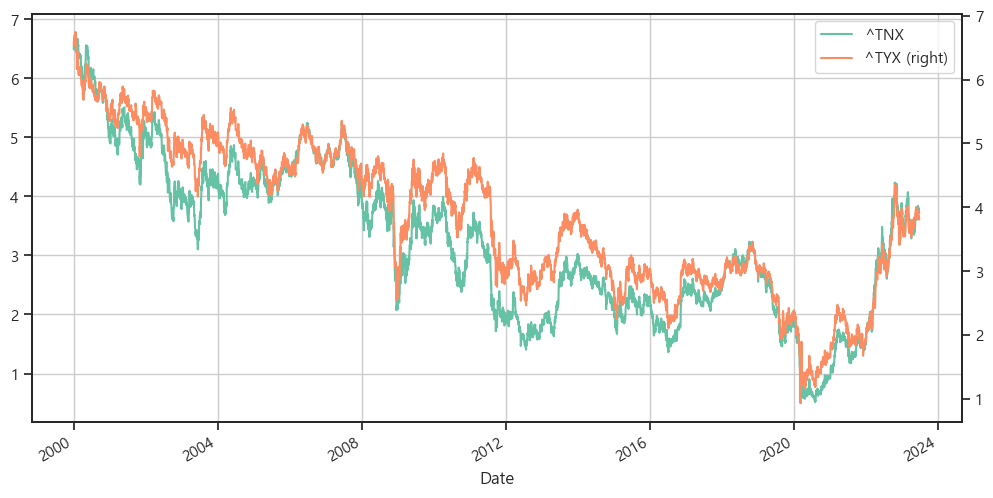

In [10]:
# data['Close'].plot() # 보조축 없이 
data['Close'].plot(secondary_y=['^TYX']) # 보조축 만듬

### ^TNX 

In [11]:
tnx = '^TNX'  # Gold symbol
start_date = "2023-01-01"
end_date = "2023-06-27"
df1 = yf.download(tnx, start=start_date, end=end_date)
# print(df1.tail(10))
df1['Range'] = (df1['High'] - df1['Low']) * 0.1  #0.5를 k값으로 가정 
# target(매수가), range(1일치) 컬럼을 한칸씩 밑으로 내림(.shift(1))
df1['Target'] = df1['Open'] + df1['Range'].shift(1)
# print(df1.head(10))

### 수익률 ror

#ror(수익률), np.where(조건문, 참일때 값, 거짓일때 값)
df1['Ror'] = np.where(df1['High'] > df1['Target'],
                     df1['Close'] / df1['Target'], #- fee,
                     1)

# df1.tail()

### 기간 누적수익률 / MDD

#누적 곱 계산(cumprod) -> 누적수익률
df1['hpr'] = df1['Ror'].cumprod()
# Draw Down 계산 (누적 최대 값과 현재 hpr 차이 / 누적 최대값 *100)
df1['dd'] = (df1['hpr'].cummax() - df1['hpr']) / df1['hpr'].cummax() * 100
#MDD 계산
print("MDD(%): ", df1['dd'].max())
print("누적수익률(%):", df1['hpr'])
print(df1.tail(20))
# df1.to_csv('TNX.csv')

[*********************100%***********************]  1 of 1 completed
MDD(%):  5.546801188978206
누적수익률(%): Date
2023-01-03    1.000000
2023-01-04    1.006349
2023-01-05    1.002469
2023-01-06    1.002469
2023-01-09    1.002469
                ...   
2023-06-20    1.247646
2023-06-21    1.232222
2023-06-22    1.249056
2023-06-23    1.249758
2023-06-26    1.253195
Name: hpr, Length: 120, dtype: float64
             Open   High    Low  Close  Adj Close  Volume   Range  Target  \
Date                                                                        
2023-05-26  3.789  3.859  3.777  3.810      3.810       0  0.0082  3.7974   
2023-05-30  3.712  3.754  3.685  3.700      3.700       0  0.0069  3.7202   
2023-05-31  3.646  3.691  3.631  3.637      3.637       0  0.0060  3.6529   
2023-06-01  3.650  3.658  3.570  3.608      3.608       0  0.0088  3.6560   
2023-06-02  3.620  3.700  3.612  3.691      3.691       0  0.0088  3.6288   
2023-06-05  3.753  3.758  3.658  3.693      3.693       0 

### TYX

In [12]:
tyx = "^TYX"  # Crude 
start_date = "2023-01-01"
end_date = "2023-06-27"
df2 = yf.download(tyx, start=start_date, end=end_date)
# print(df2.tail(10))
df2['Range'] = (df2['High'] - df2['Low']) * 0.4  #0.5를 k값으로 가정 
# target(매수가), range(1일치) 컬럼을 한칸씩 밑으로 내림(.shift(1))
df2['Target'] = df2['Open'] + df2['Range'].shift(1)
# print(df1.head(10))

### 수익률 ror

#ror(수익률), np.where(조건문, 참일때 값, 거짓일때 값)
df2['Ror'] = np.where(df2['High'] > df2['Target'],
                     df2['Close'] / df2['Target'], #- fee,
                     1)

# df2.tail()

### 기간 누적수익률 / MDD

#누적 곱 계산(cumprod) -> 누적수익률
df2['hpr'] = df2['Ror'].cumprod()
# Draw Down 계산 (누적 최대 값과 현재 hpr 차이 / 누적 최대값 *100)
df2['dd'] = (df2['hpr'].cummax() - df2['hpr']) / df2['hpr'].cummax() * 100
#MDD 계산
print("MDD(%): ", df2['dd'].max())
print("누적수익률(%):", df2['hpr'])
print(df2.tail(20))

[*********************100%***********************]  1 of 1 completed
MDD(%):  8.658144335918482
누적수익률(%): Date
2023-01-03    1.000000
2023-01-04    0.999948
2023-01-05    0.983275
2023-01-06    0.983275
2023-01-09    0.983275
                ...   
2023-06-20    0.954373
2023-06-21    0.938501
2023-06-22    0.942787
2023-06-23    0.942787
2023-06-26    0.944964
Name: hpr, Length: 120, dtype: float64
             Open   High    Low  Close  Adj Close  Volume   Range  Target  \
Date                                                                        
2023-05-26  3.972  4.004  3.954  3.969      3.969       0  0.0200  3.9928   
2023-05-30  3.893  3.938  3.880  3.903      3.903       0  0.0232  3.9130   
2023-05-31  3.865  3.903  3.852  3.856      3.856       0  0.0204  3.8882   
2023-06-01  3.848  3.853  3.802  3.833      3.833       0  0.0204  3.8684   
2023-06-02  3.833  3.886  3.828  3.882      3.882       0  0.0232  3.8534   
2023-06-05  3.939  3.946  3.862  3.890      3.890       0 

### 종가기준으로 만든 데이터 합치기

df1 = df1['Close']
df2 = df2['Close']  # 종가만 뽑아내기

data = {
    "df1" : df1,
    "df2" : df2
}
data   # df1, df2 를 data로 한개의 딕셔너리 형태로 묶음

import pandas as pd
df = pd.DataFrame(data) # pandas dataframe() 함수 이용해서 data를 하나로 묶음
df.plot()  

In [14]:
df1['Close'].tail()

Date
2023-06-20    3.729
2023-06-21    3.723
2023-06-22    3.799
2023-06-23    3.739
2023-06-26    3.719
Name: Close, dtype: float64

## 데이터 정규화 

<Axes: xlabel='Date'>

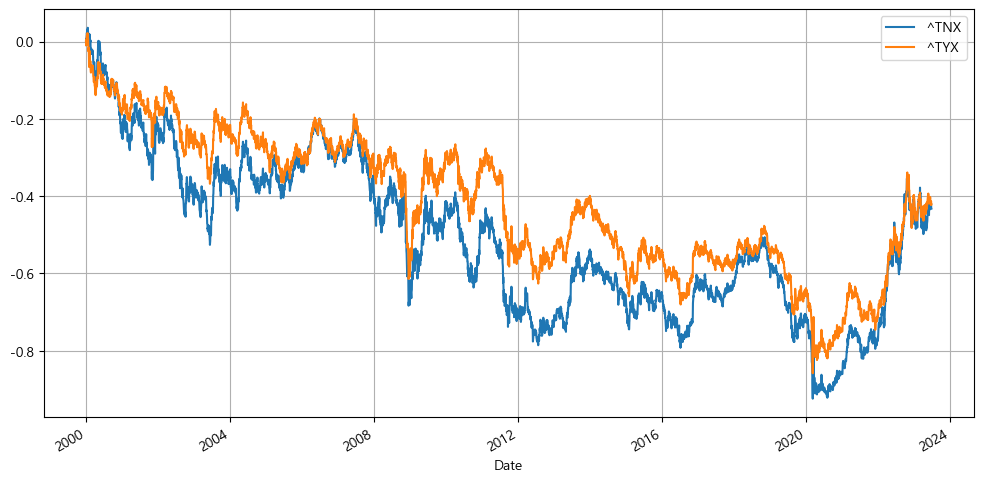

In [9]:
data_norm = data / data.iloc[0] - 1
data_norm['Close'].plot()

In [10]:
# data_norm[.iloc[-1].sort_values(ascending=False)

## 회귀분석

In [11]:
from sklearn.linear_model import LinearRegression #sklearn 싸이킷런에서 회귀모델을 가져오겠다.
import numpy as np
import pandas as pd

In [12]:
X = data['Close'].iloc[:,:1].values  # TNX
y = data['Close'].iloc[:,:-1].values # TYX
X,y
len(X), len(y)
X.shape, y.shape

((5900, 1), (5900, 1))

In [13]:
# np.nan_to_num(y, nan = np.nanmean(y))  # numpy ndarray의 결측값 평균으로 처리

In [14]:
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # fit이 학습모델 -> 학습하면서 모델생성

LinearRegression()

In [15]:
y_pred = reg.predict(X)  # regression 모델 이용한 X에 대한 y 값 예측
y_pred

array([[6.54799986],
       [6.48500013],
       [6.59899998],
       ...,
       [3.79900002],
       [3.73900008],
       [3.7190001 ]])

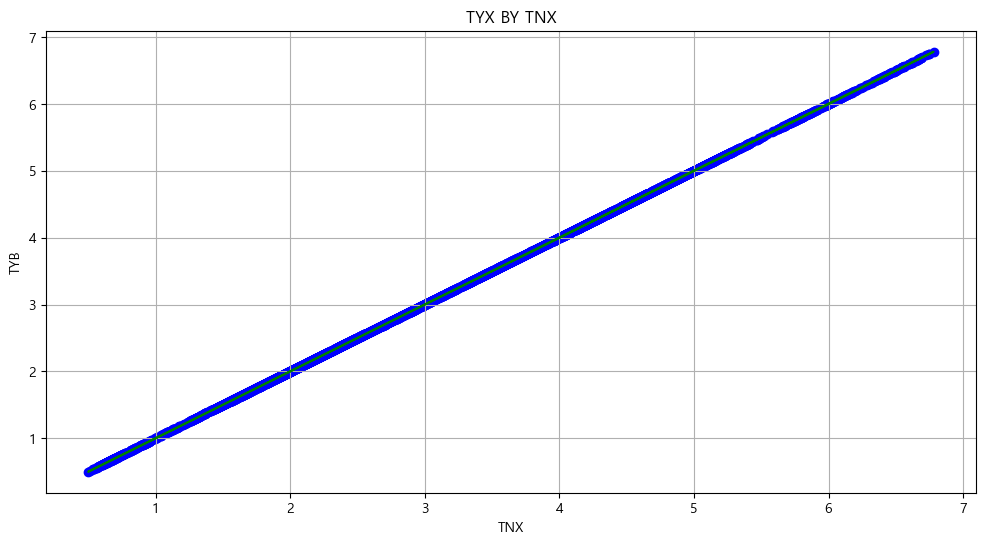

In [16]:
plt.scatter(X,y, color='blue') # 산점도 그래프 (실제 값 그래프)
plt.plot(X, y_pred, color='green')  # 선 그래프 (싸이킷런에서 회귀모델로 학습한 훟 예측한 그래프)
plt.title('TYX BY TNX')
plt.xlabel('TNX')
plt.ylabel('TYB')
plt.show()

In [17]:
# print('TXY에 따른 TYX 예측값 :', reg.predict([[3.8]]))
# print('9,8,10시간 공부했을 때 예상 점수 :', reg.predict([[9],[8],[10]]))

### 데이터 세트 분리

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [19]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4720, 1180, 4720, 1180)

In [20]:
reg = LinearRegression()
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

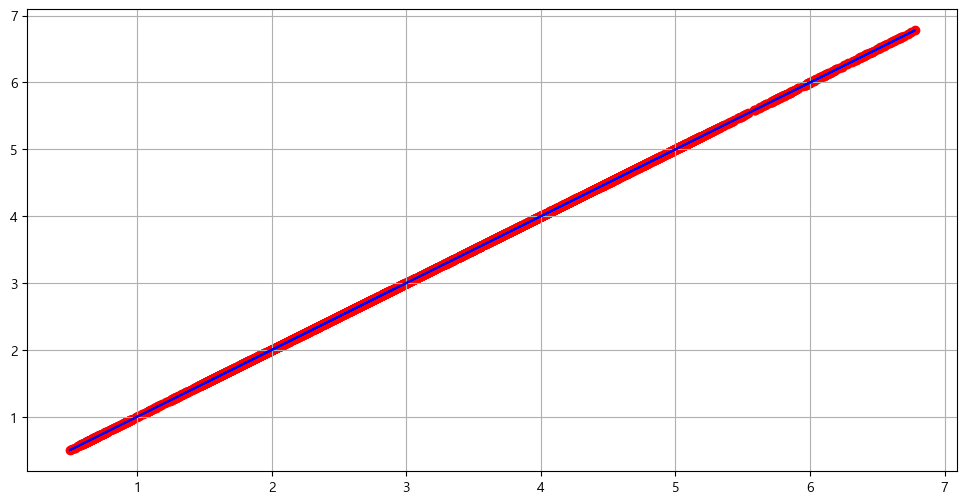

In [21]:
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')
plt.title = 'tyx by tny'
plt.xlabel = 'tny'
plt.ylabel = 'tyx'
plt.show()

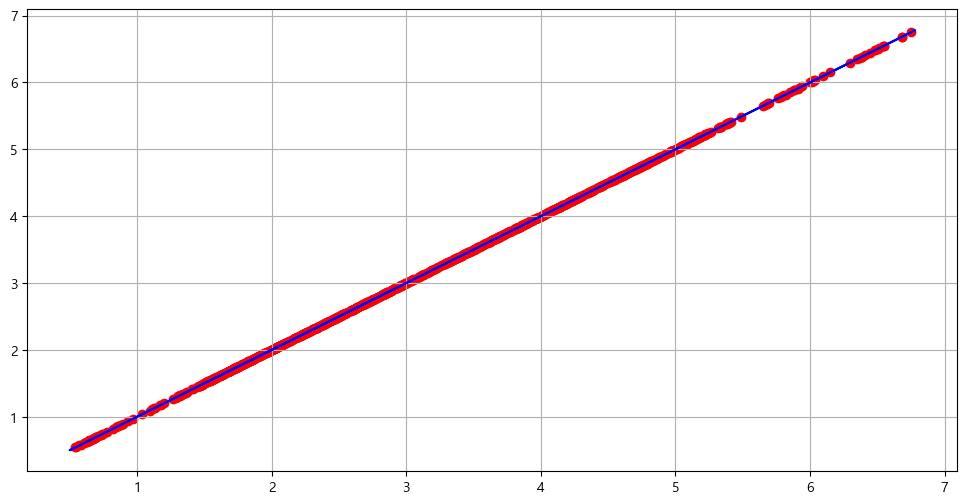

In [22]:
plt.scatter(X_test,y_test, color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')
plt.title = 'tyx by tny'
plt.xlabel = 'tny'
plt.ylabel = 'tyx'
plt.show()

In [23]:
reg.coef_ , reg.intercept_

(array([[1.]]), array([-2.22044605e-15]))

### 모델 평가

In [24]:
reg.score(X_train,y_train), reg.score(X_test,y_test)

(1.0, 1.0)

In [28]:
pip install backtesting

Note: you may need to restart the kernel to use updated packages.Collecting backtesting
     -------------------------------------- 175.5/175.5 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173847 sha256=1b1321d9ebd27a044b26ee10947daabde0da898866df7502a3a881f7e7dbb923
  Stored in directory: c:\users\com\appdata\local\pip\cache\wheels\e7\89\21\ebf3b5c7680f923554bb883380c53a28dedb085845df14ceb1
Successfully built backtesting



In [29]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(GOOG, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()

C:\Users\com\anaconda3\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

Row(id='1450', ...)

In [1]:
pip install bt

  Using cached bt-0.2.9.tar.gz (2.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached PyPrind-2.11.3-py2.py3-none-any.whl (8.4 kB)
  Using cached ffn-0.3.7-py2.py3-none-any.whl (26 kB)
  Created wheel for bt: filename=bt-0.2.9-cp310-cp310-win_amd64.whl size=197401 sha256=d879118b1bde60fa7455c3c2b554ea7bee97b1443b170da714064760df885915
  Stored in directory: c:\users\com\appdata\local\pip\cache\wheels\a9\2e\9a\c712c2387679f3fd83abe9dedc1963412ee62c8a429d0d6d93
Successfully built bt
Note: you may need to restart the kernel to use updated packages.


In [2]:
import bt

In [30]:
data_1 = bt.get("SPY, TLT", start='2003-01-01')
data_1.tail()

,spy,tlt
Date,,
2023-06-26,431.440002,103.440002
2023-06-27,436.170013,103.169998
2023-06-28,436.390015,103.610001
2023-06-29,438.109985,101.739998
2023-06-30,443.279999,102.940002


In [32]:

# 전체 자산 동일비중, 매월 말 리밸런싱
strategy = bt.Strategy("Asset_EW", [
    bt.algos.SelectAll(),
    bt.algos.WeighEqually(),
    bt.algos.RunMonthly(),
    bt.algos.Rebalance()
])

In [37]:
data_1.dropna()
# 백테스트 생성
backtest = bt.Backtest(strategy, data_1)

# 백테스트 실행
result = bt.run(backtest)

# 백테스트 결과확인 함수
result.prices 

In [40]:
result.prices.to_returns()

,Asset_EW
2003-01-01,NaN
2003-01-02,0.000000
2003-01-03,0.002696
2003-01-06,0.007486
2003-01-07,0.000528
...,...
2023-06-26,-0.001547
2023-06-27,0.004255
2023-06-28,0.002350
2023-06-29,-0.006872


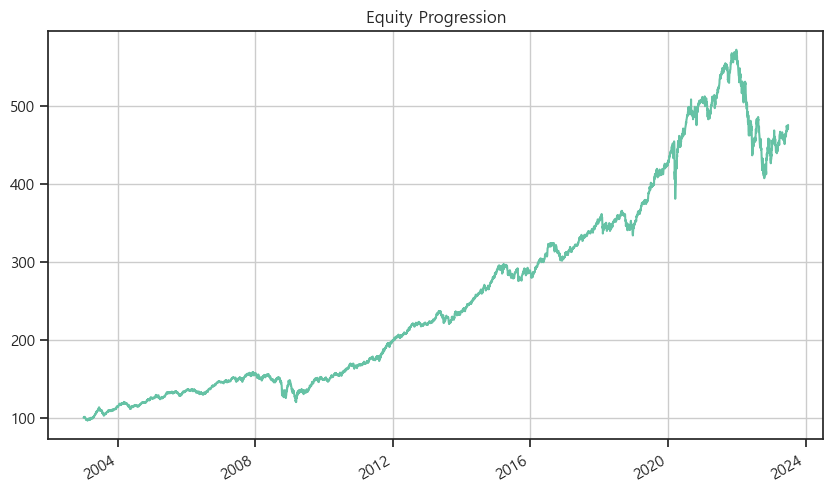

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

result.plot(figsize=(10, 6), legend=False)
plt.show()

In [42]:
result.get_security_weights().head()

,spy,tlt
2003-01-01,0.000000,0.000000
2003-01-02,0.499992,0.499962
2003-01-03,0.500181,0.499774
2003-01-06,0.505214,0.494741
2003-01-07,0.503698,0.496257


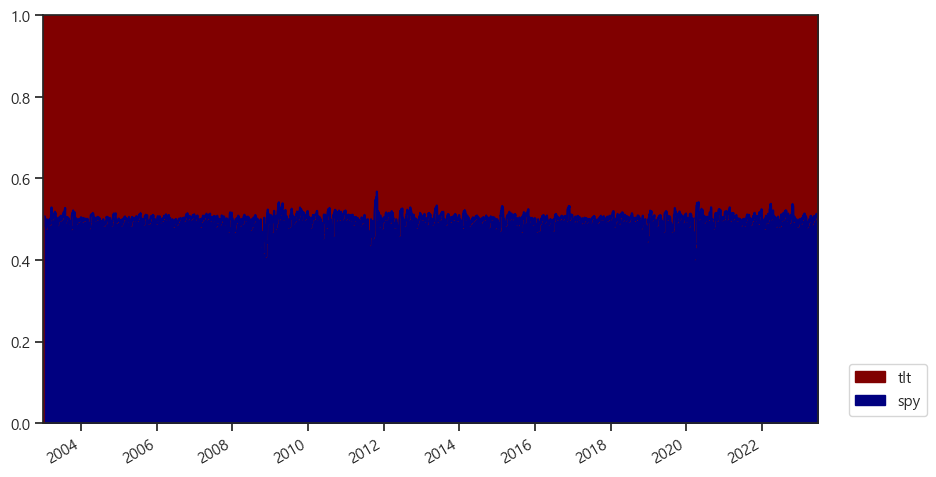

In [43]:
from matplotlib import cm

ax = result.get_security_weights().plot.area(figsize=(10, 6),
                                             ylim=[0, 1],
                                             legend=False,
                                             colormap=cm.jet)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles),
           reversed(labels),
           loc='lower right',
           bbox_to_anchor=(1.15, 0))
plt.show()

In [44]:
result.display()

Stat                 Asset_EW
-------------------  ----------
Start                2003-01-01
End                  2023-06-30
Risk-free rate       0.00%

Total Return         375.28%
Daily Sharpe         0.85
Daily Sortino        1.36
CAGR                 7.90%
Max Drawdown         -28.81%
Calmar Ratio         0.27

MTD                  3.34%
3m                   4.51%
6m                   10.68%
YTD                  10.68%
1Y                   5.27%
3Y (ann.)            0.51%
5Y (ann.)            6.16%
10Y (ann.)           7.71%
Since Incep. (ann.)  7.90%

Daily Sharpe         0.85
Daily Sortino        1.36
Daily Mean (ann.)    8.07%
Daily Vol (ann.)     9.54%
Daily Skew           -0.20
Daily Kurt           7.53
Best Day             5.55%
Worst Day            -5.38%

Monthly Sharpe       0.89
Monthly Sortino      1.48
Monthly Mean (ann.)  8.17%
Monthly Vol (ann.)   9.20%
Monthly Skew         -0.79
Monthly Kurt         2.76
Best Month           8.08%
Worst Month          -10.62%

Yearl

### K value

In [ ]:
com_list = ['GC=F','SI=F','CL=F','BZ=F','NG=F','HG=F','ZC=F','ZW=F']
commodity_symbol = "GC=F"  # Gold symbol
start_date = "2023-01-01"
end_date = "2023-06-27"

for com in com_list:
    data = yf.download(com_list, start=start_date, end=end_date)['High']
print(data.tail(10))

In [ ]:
com_list = ['GC=F','SI=F','CL=F','BZ=F','NG=F','HG=F','ZC=F','ZW=F']
commodity_symbol = "GC=F"  # Gold symbol
start_date = "2023-01-01"
end_date = "2023-06-27"

for com in com_list:
    data = yf.download(com_list, start=start_date, end=end_date)['Low']
print(data.tail(10))

In [ ]:
data.cols = data['High','Low']
data.tail()